In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,name,image,link,no_of_ratings,discount_price,actual_price,rating,review_text,brand,cleaned_review_text,sentiment
0,OnePlus Nord CE 2 Lite 5G Blue Tide 6GB RAM 12...,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,113956.0,18999.0,19999.0,1.0,Very bad experience with this device xr phone....,OnePlus,bad experience device xr phone back camera fou...,Negative
1,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,90304.0,1999.0,2299.0,5.0,Amazing phone with amazing camera coming from ...,OnePlus,amazing phone amazing camera coming device plu...,Positive
2,Samsung Galaxy M33 5G Mystique Green 6GB 128GB...,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,24863.0,15999.0,24999.0,1.0,So I got the device XR just today. The product...,Samsung,got device xr today product look amazing unfor...,Negative
3,OnePlus Nord CE 2 Lite 5G Black Dusk 6GB RAM 1...,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,113956.0,18999.0,19999.0,5.0,I've been an android user all my life until I ...,OnePlus,ive android user life decided try device xr io...,Positive
4,Redmi 10 Power Sporty Orange 8GB RAM 128GB Sto...,https://m.media-amazon.com/images/I/81OZGH4fZi...,https://www.amazon.in/Redmi-Power-Sporty-Orang...,625.0,10999.0,18999.0,1.0,I was delivered a phone that did not work imme...,Redmi,delivered phone work immediately removing box ...,Negative


In [3]:
import re 

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '',text)
    return text
    
df['clean_product'] = df['review_text'].apply(clean_text)

In [5]:
!pip install textblob

In [4]:
df['cleaned_review_text'] = df['cleaned_review_text'].fillna('')

In [5]:
from textblob import TextBlob
text = TextBlob("Jupyter Notebook makes Python easy")
print(text.sentiment)
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return 'Neutral'
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)


In [6]:
df['Sentiment'] = df['cleaned_review_text'].apply(get_sentiment)
get_sentiment("I love using Jupyter Notebook")

'Positive'

In [7]:
df['Sentiment'] = df['cleaned_review_text'].apply(get_sentiment)
get_sentiment("This is the worst experience")

'Negative'

In [8]:
df['Sentiment'] = df['cleaned_review_text'].apply(get_sentiment)
get_sentiment("This is a software too")

'Neutral'

In [9]:
from textblob import TextBlob
def sentiment_details(text):
    blob = TextBlob(text)
    return 
    {
        "Text": text,
        "Polarity": blob.sentiment.polarity,
        "Sentiment": get_sentiment(text)
    }
sentiment_details("The Quality of the Product is very high")
sentiment_details("This is the worst experience")
sentiment_details("The product was delivered yesterday")
samples = [
    "The Quality of the Product is very high",
    "This is the worst experience",
    "The product was delivered yesterday"
]
for s in samples: 
    print(s,"->",get_sentiment(s))

The Quality of the Product is very high -> Positive
This is the worst experience -> Negative
The product was delivered yesterday -> Neutral


In [10]:
df['Sentiment'] = df['cleaned_review_text'].apply(get_sentiment)
df[['cleaned_review_text','Sentiment']].head()

,cleaned_review_text,Sentiment
0,bad experience device xr phone back camera fou...,Negative
1,amazing phone amazing camera coming device plu...,Positive
2,got device xr today product look amazing unfor...,Positive
3,ive android user life decided try device xr io...,Positive
4,delivered phone work immediately removing box ...,Positive


In [11]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Positive    3886
Neutral      728
Negative     240
Name: count, dtype: int64

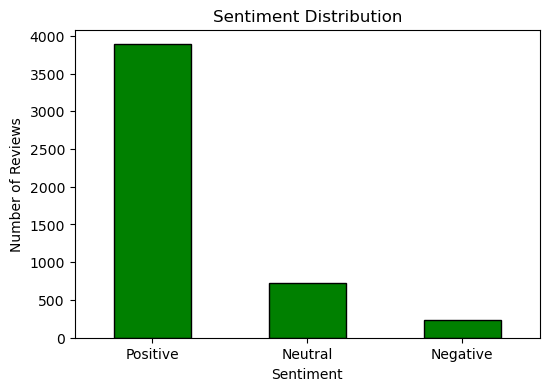

In [19]:
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar',color = 'green',edgecolor = 'black')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()